In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

## Load and check data

In [94]:
pd.options.display.max_columns = None

pd.set_option('display.max_rows', None)

data = pd.read_csv("./Daegu_Real_Estate_data.csv")
data.head(2)

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_APT,N_manager,N_elevators,SubwayStation,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,3.0,0.0,Kyungbuk_uni_hospital,2.0,1,1.0,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,2.0,2.0,Daegu,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

Remove not number data type and not support data

In [96]:
x = data.select_dtypes(exclude=['object'])
del x["YearBuilt"]
del x["YrSold"]
del x["MonthSold"]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   Size(sqf)                           5891 non-null   int64  
 2   Floor                               5891 non-null   int64  
 3   N_Parkinglot(Ground)                5891 non-null   float64
 4   N_Parkinglot(Basement)              5891 non-null   float64
 5   N_APT                               5891 non-null   float64
 6   N_manager                           5891 non-null   float64
 7   N_elevators                         5891 non-null   float64
 8   N_FacilitiesNearBy(PublicOffice)    5891 non-null   float64
 9   N_FacilitiesNearBy(Hospital)        5891 non-null   int64  
 10  N_FacilitiesNearBy(Dpartmentstore)  5891 non-null   float64
 11  N_FacilitiesNearBy(Mall)            5891 no

## Find optimal number of cluster using elbow method

convert data frame to array

In [97]:
x = np.array(x)

Building the clustering model and calculating the values of the Distortion and Inertia

In [98]:
# Prepare variable
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

# for loop setup
K = range(1, 10)
for k in K:
 # create KMeans Model
 kmeanModel = KMeans(n_clusters=k, n_init='auto')
 kmeanModel.fit(x)
    
 # filled distortions and intertias values
 distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
 inertias.append(kmeanModel.inertia_)
    
 mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / x.shape[0]
 mapping2[k] = kmeanModel.inertia_

## Tabulating and Visualizing the result

In [99]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 87150.36946408468
2 : 49801.90414829839
3 : 34901.28457483956
4 : 25996.850317743185
5 : 21446.692399176205
6 : 17255.693305711244
7 : 15019.528179897772
8 : 13688.949240889177
9 : 11971.731745269499


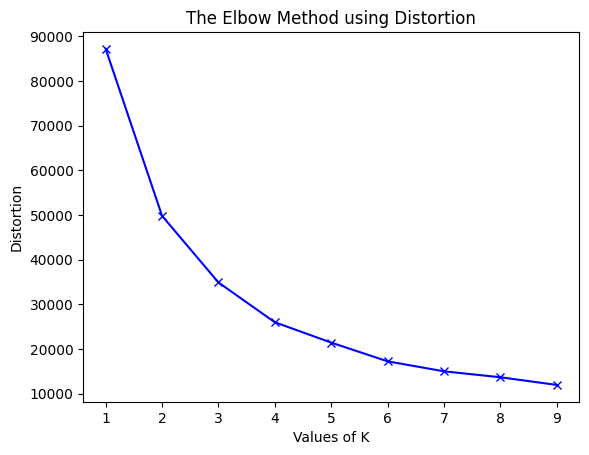

In [100]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [101]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 66662762899207.03
2 : 21275472965394.906
3 : 10174277792386.205
4 : 6019731032245.725
5 : 3867251043851.01
6 : 2617564125753.906
7 : 2017704956757.3862
8 : 1621056396596.9785
9 : 1373766648527.2305


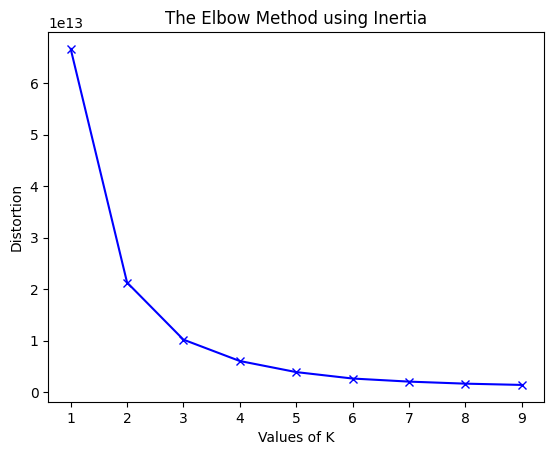

In [109]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Inertia')
plt.show()

Because k=3 is the lowest and the one that end the extreme curving, so we can say it is the optimal number

In [103]:
# Define the model
kmeans_model = KMeans(n_clusters=3, n_init='auto', random_state=32932)
# Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(x)

In [104]:
data['cluster'] = kmeans_predict

## Result

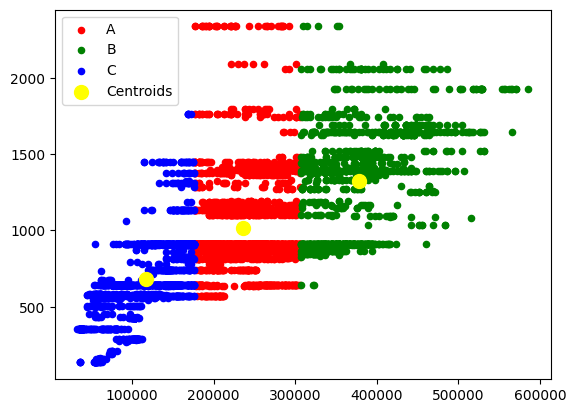

In [105]:
# Visualising the clusters
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 20, c = 'red', label = 'A')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 20, c = 'green', label = 'B')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 20, c = 'blue', label = 'C')
# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

Describe cluster A

In [106]:
data[data.cluster==0].describe()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),cluster
count,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.00000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.0
mean,236031.471690,2004.418476,2012.752235,6.513836,1015.357599,11.962537,224.46275,573.395062,5.674330,6.191145,11.349510,3.475521,1.340145,0.824606,0.962112,1.650064,0.624521,2.856535,2.471690,2.456364,2.468710,5.985100,8.876969,10.253299,0.0
std,36107.304209,7.597454,2.629913,3.318730,307.327916,7.073859,228.84674,375.779316,2.595195,3.162761,7.762171,1.665596,0.475653,0.780332,0.504506,2.034242,0.658721,0.781671,0.920005,1.320262,1.301118,2.091648,3.143735,3.780289,0.0
min,176548.000000,1978.000000,2007.000000,1.000000,572.000000,1.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0
25%,203539.000000,2005.000000,2011.000000,4.000000,868.000000,6.000000,67.00000,203.000000,3.000000,5.000000,5.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,4.000000,7.000000,8.000000,0.0
50%,236283.000000,2006.000000,2013.000000,6.000000,914.000000,11.000000,123.00000,536.000000,6.000000,6.000000,11.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,9.000000,9.000000,0.0
75%,265486.000000,2008.000000,2015.000000,9.000000,1149.000000,17.000000,523.00000,798.000000,8.000000,8.000000,16.000000,5.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,4.000000,7.000000,9.000000,14.000000,0.0
max,306194.000000,2015.000000,2017.000000,12.000000,2337.000000,34.000000,713.00000,1321.000000,13.000000,14.000000,27.000000,7.000000,2.000000,2.000000,2.000000,5.000000,2.000000,6.000000,4.000000,5.000000,5.000000,10.000000,14.000000,17.000000,0.0


Describe cluster B

In [107]:
data[data.cluster==1].describe()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),cluster
count,1283.00000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.0
mean,377688.49961,2008.235386,2014.182385,6.462198,1322.819953,16.052221,116.628995,870.834762,6.123149,8.183164,13.316446,3.373344,1.028839,1.355417,0.974279,0.664069,1.021044,2.601715,2.067030,1.900234,2.034295,7.551052,8.416991,8.603274,1.0
std,53294.43886,4.861010,2.905066,3.188919,357.069979,9.401410,178.852582,380.321570,3.018733,3.869957,5.995937,1.798805,0.353203,0.867119,0.328272,1.662708,0.750679,0.950193,0.985953,1.294784,1.288522,2.389428,3.223828,4.161620,0.0
min,307079.00000,1978.000000,2007.000000,1.000000,644.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.0
25%,336283.00000,2007.000000,2013.000000,4.000000,914.000000,8.000000,0.000000,536.000000,3.000000,5.000000,10.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,5.000000,9.000000,5.000000,1.0
50%,365486.00000,2007.000000,2015.000000,6.000000,1387.000000,15.000000,7.000000,930.000000,7.000000,6.000000,14.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,8.000000,9.000000,9.000000,1.0
75%,406636.50000,2013.000000,2016.000000,9.000000,1643.000000,22.000000,175.000000,1270.000000,7.000000,14.000000,16.000000,4.000000,1.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000,2.000000,2.000000,10.000000,9.000000,10.000000,1.0
max,585840.00000,2015.000000,2017.000000,12.000000,2337.000000,43.000000,713.000000,1321.000000,13.000000,14.000000,27.000000,7.000000,2.000000,2.000000,2.000000,5.000000,2.000000,4.000000,4.000000,5.000000,5.000000,10.000000,14.000000,17.000000,1.0


Describe Cluster C

In [108]:
data[data.cluster==2].describe()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),cluster
count,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.0
mean,116947.157592,1998.466578,2011.781762,5.621071,684.818504,9.806109,211.178398,397.596724,5.261178,5.370518,9.701638,5.270474,1.401948,0.710049,0.901284,2.969456,0.476760,3.433820,2.560868,3.301461,3.487384,4.637893,11.729969,12.783533,2.0
std,39202.945797,9.533128,2.818185,3.498300,239.316751,5.681582,217.655743,354.137608,2.858480,2.117546,8.431113,1.263675,0.490400,0.703994,0.302767,2.166957,0.500456,0.964575,1.133354,1.663939,1.471668,1.803180,3.031374,4.440391,0.0
min,32743.000000,1978.000000,2007.000000,1.000000,135.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.0
25%,79646.000000,1992.000000,2010.000000,3.000000,572.000000,5.000000,67.000000,56.000000,3.000000,4.000000,0.000000,5.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,2.000000,3.000000,9.000000,11.000000,2.0
50%,122123.000000,1993.000000,2011.000000,5.000000,644.000000,10.000000,100.000000,536.000000,7.000000,6.000000,10.000000,5.000000,1.000000,1.000000,1.000000,5.000000,0.000000,4.000000,3.000000,4.000000,4.000000,4.000000,13.000000,15.000000,2.0
75%,150442.000000,2005.000000,2014.000000,9.000000,903.000000,14.000000,523.000000,798.000000,8.000000,8.000000,20.000000,6.000000,2.000000,1.000000,1.000000,5.000000,1.000000,4.000000,3.000000,5.000000,5.000000,7.000000,14.000000,17.000000,2.0
max,176106.000000,2014.000000,2017.000000,12.000000,1761.000000,26.000000,713.000000,1270.000000,10.000000,14.000000,27.000000,7.000000,2.000000,2.000000,2.000000,5.000000,2.000000,6.000000,4.000000,5.000000,5.000000,10.000000,16.000000,17.000000,2.0
